In [1]:
%store -r __importing_Lib

In [2]:
__importing_Lib

matplotlib inline backend and ggplot style are used.
Mplotlib version : 3.1.1
Numpy version	 : 1.17.3
Pandas version	 : 0.25.3
Seaborn version	 : 0.9.0
Folium version	 : 0.10.0
Other imported is: Waffle      
		 : datetime      
		 : base64      
		 : Json


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from folium import plugins
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
import graphviz
import os
from ipywidgets import interact
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz2.38/bin/'
pd.set_option('display.max_columns', 25, 'display.max_rows', 100)

```python
eq_df = pd.read_csv('query.csv')```

```python
boolean = eq_df.place.str.split().str[-1]
boolean = boolean.map(lambda x: x in ['Burma', 'Myanmar'])
eq_df = eq_df[boolean]
eq_df['local_time'] = eq_df.time.map(lambda x: pd.Timestamp(x, tz='Asia/Yangon'))
eq_df.sort_values(['latitude'], ascending=False, inplace=True)
eq_df.index = range(len(eq_df))
eq_df.head()```

```python
X = eq_df.longitude
Y = eq_df.latitude
xmin, xmax = X.min()-1, X.max()+2
ymin, ymax = Y.min()-2.8, Y.max()+2
xmin, xmax, ymin, ymax```

```python
groups = eq_df.groupby(['mag'], as_index=False, sort=False)
groups```

```python
proj = ccrs.Mercator()
plt.figure(figsize=(18,9))
ax = plt.axes(projection=proj)
ax.set_extent((xmin, xmax, ymin, ymax))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for lab, grp in groups:
    x, y = grp.longitude, grp.latitude
    ax.plot(x, y, '.', transform=ccrs.Geodetic())
plt.legend(loc=1);```

```python
kachin = [358, 369, 317, 316, 329, 312, 342, 328, 322, 319, 303, 302, 308, 321, 336]
sagaing = ([100, 144, 154, 167, 191, 193, 157, 138, 131, 133,
           196, 158, 151, 142, 149, 178, 183, 135, 130, 
           129, 141, 146, 148, 169, 172, 188, 195, 119, 120, 121, 122, 126] + [3, 12, 28, 85, 92, 94, 98] + 
          [207, 250, 216, 219, 218, 227, 230, 204, 203, 211, 205, 212, 217,
           206, 214, 222, 223, 225, 228, 229, 232, 233, 235, 242,
           245, 244, 239, 240, 243, 256, 251, 253, 254, 252, 259, 264, 280, 
           297, 282, 273, 269, 272, 281, 276, 285, 291, 283, 262, 279, 298, 
           296, 287, 284, 271, 268, 260, 258, 274, 288]+
          [idx for idx in range(300,400) if idx not in kachin])

loc_dict = {}
for i in range(400):
    if i not in sagaing:
        loc_dict[i] = 'Kachin'
    else:
        loc_dict[i] = 'Sagaing'
loc_dict ```

```python
kachin = [406]
shan = [435, 532, 620, 758, 837, 852, 853, 858, 874, 876, 877, 891, 899, 907, 913, 929, 972, 988, 985,
        971, 998, 997, 986, 970, 914, 956, 961, 944, 938, 937, 918, 950, 975, 964, 952, 946, 945, 930, 920,
        919, 924, 927, 926, 935, 943, 965, 991, 928, 995, 1095, 1069, 1042, 1002, 1057, 1052, 1062, 1047, 1040,
        1019, 1070, 1089, 1026, 1027, 1075, 1031, 1018, 1011, 1035, 1102,1109,1110, 1111, 1116, 1120, 1123, 1124,
        1125, 1127, 1128, 1132, 1136, 1140, 1141, 1148, 1149, 1153, 1155, 1159, 1160, 1170, 1173, 1174, 1177, 1178,
        1180, 1183, 1186, 1188, 1189, 1192, 1193, 1198, 1215, 1202, 1207, 1204]
chin = [493, 483, 478, 460, 459, 432, 521, 542, 548, 585, 677, 781, 794, 776, 773, 746, 815, 821, 826, 829, 839,
        840, 851, 859, 864, 917, 923, 931, 940, 949, 955, 966, 969, 977, 983, 984, 987, 990, 1008, 1024, 1021, 1012,
        1001, 1014, 1013, 1005, 1000, 1028, 1038, 1037, 1041, 1049, 1051, 1054, 1058, 1060, 1053, 1055, 1059, 1061,
        1065, 1066, 1063, 1080, 1090, 1092, 1094, 1088, 1086, 1084, 1098, 1097, 1101, 1106, 1112]
near_chin = [429, 442, 444]
mandalay = [577, 611, 635, 638, 647, 646, 697, 688, 676, 645, 715, 718, 719, 725, 731, 745, 750, 759, 772, 792, 796,
            798, 822, 951, 980, 1045, 1046, 1085, 1093, 1096, 1079, 1100, 1131, 1164, 1172]
magway = [778, 795, 809, 812, 831, 833, 835, 846, 861, 863, 865, 866, 870, 882, 892, 895, 896, 898, 903, 905, 908, 909,
          910, 911, 922, 932, 933, 939, 959, 962, 963, 967, 999, 994, 992, 981, 976, 993, 996, 989, 978, 979, 953, 948,
          960, 968, 973, 954, 957, 974, 982, 1003, 1010, 1015, 1016, 1023, 1020, 1004, 1022, 1017, 1009, 1006, 1007,
          1025, 1032, 1039, 1050, 1044, 1043, 1033, 1036, 1048, 1029, 1030, 1034, 1056, 1073, 1077, 1081, 1072, 1067,
          1068, 1074, 1083, 1078, 1071, 1064, 1076, 1087, 1091, 1099, 1104, 1113, 1119, 1121, 1142, 1146, 1154, 1161, 
          1165, 1156, 1152, 1144, 1139, 1181, 1176, 1169, 1162, 1151, 1133, 1122, 1117, 1108, 1107, 1105, 1114, 1126,
          1137, 1138, 1130, 1135, 1143, 1150, 1157, 1166, 1168, 1175, 1187, 1196, 1197, 1195, 1190, 1184, 1199, 1200,
          1206, 1208, 1209, 1210, 1211, 1214, 1216, 1217, 1219, 1220, 1221, 1222, 1225, 1226, 1227, 1228, 1230, 1231, 
          1232, 1235, 1237, 1238, 1239, 1240, 1242, 1243, 1244, 1246, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255,
          1256, 1257, 1260, 1261, 1265, 1266, 1267, 1270, 1271, 1272, 1274, 1275, 1276, 1277, 1279, 1280, 1281, 1282,
          1284, 1285, 1286, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1296, 1297, 1298, 1299, 1303, 1305, 1316, 1313, 
          1308, 1306, 1301, 1302, 1304, 1307]
rakhine = [1082, 1103, 1118, 1129, 1145, 1158, 1134, 1147, 1171, 1182, 1194, 1163, 1185, 1212, 1224, 1245, 1262, 1269, 
           1321, 1322, 1345, 1348, 1356, 1377, 1384, 1389, 1394, 1396, 1398, 1405, 1412]
near_rakhine = [1115]
rk_coast = [1167, 1205, 1247, 1264, 1273, 1309, 1335, 1336, 1354, 1378, 1390, 1400, 1401, 1408, 1409, 1411, 1416, 1423, 
            1427, 1432, 1433, 1434, 1441, 1443, 1455, 1465, 1466, 1473, 1483]
Nay_Pyi_Taw = [1179, 1191, 1201, 1203, 1213, 1218, 1223, 1233, 1229, 1236, 1241, 1234, 1258, 1259, 1263, 1268]
Bago = [1283, 1287, 1295, 1311, 1312, 1314, 1315, 1317, 1319, 1320, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330,
        1331, 1332, 1333, 1334, 1338, 1339, 1340, 1342, 1343, 1344, 1346, 1347, 1349, 1350, 1351, 1352, 1353, 1355, 
        1357, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1379,
        1381, 1382, 1383, 1385, 1386, 1387, 1388, 1391, 1392, 1393, 1395, 1397, 1404, 1407, 1406, 1410, 1413, 1414, 
        1415, 1419, 1422, 1437]
Kayah = [1278, 1300, 1310]
bog = [1337, 1341, 1399]
Ayeyarwady = [1376, 1358, 1367, 1380, 1402, 1403, 1421, 1424, 1425, 1426, 1436, 1438, 1444, 1445, 1446, 1448, 1449, 
              1450, 1451, 1452, 1454, 1456, 1461, 1462, 1469, 1471, 1472, 1474, 1475, 1476, 1477, 1479, 1480, 1484,
              1486, 1489, 1496]
outofmyan = [1318, 1417]
Kayin = [1418]
Yangon = [1420, 1428, 1429, 1430, 1431, 1435, 1439, 1440, 1442, 1447, 1453, 1457, 1458, 1460, 1463, 1464, 1468, 1467,
          1459]
mmcoast = [1470, 1478, 1485, 1493, 1498, 1495, 1497, 1494, 1491, 1492, 1490, 1488, 1482, 1481, 1487, 1499, 1500, 1501, 
           1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519,
           1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537,
           1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554]
tot = (kachin + shan + chin + near_chin + mandalay + magway + rakhine + near_rakhine + rk_coast + Nay_Pyi_Taw +
       Bago + Kayah + bog + Ayeyarwady + outofmyan + Kayin + Yangon + mmcoast)

for i in range(400, len(eq_df)):
    if i not in tot:
        loc_dict[i] = 'Sagaing'
    elif i in kachin:
        loc_dict[i] = 'Kachin'
    elif i in chin:
        loc_dict[i] = 'Chin'
    elif i in shan:
        loc_dict[i] = 'Shan'
    elif i in near_chin:
        loc_dict[i] = 'near_chin'
    elif i in mandalay:
        loc_dict[i] = 'Mandalay'
    elif i in magway:
        loc_dict[i] = 'Magway'
    elif i in rakhine:
        loc_dict[i] = 'Rakhine'
    elif i in near_rakhine:
        loc_dict[i] = 'near_rakhine'
    elif i in rk_coast:
        loc_dict[i] = 'Coast of rakhine'
    elif i in Nay_Pyi_Taw:
        loc_dict[i] = 'Nay Pyi Taw'
    elif i in Bago:
        loc_dict[i] = 'Bago'
    elif i in Kayah:
        loc_dict[i] = 'Kayah'

    elif i in bog:
        loc_dict[i] = 'Bay of Bengal'
    elif i in Ayeyarwady:
        loc_dict[i] = 'Ayeyarwady'
    elif i in outofmyan:
        loc_dict[i] = 'outofmyan'  
    elif i in Kayin:
        loc_dict[i] = 'Kayin'
    elif i in Yangon:
        loc_dict[i] = 'Yangon'
    elif i in mmcoast:
        loc_dict[i] = 'mmcoast'

print(len(loc_dict))
loc_dict```


```python
mmeq_df = pd.DataFrame(columns=['local_time', 'date', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'location'])
for row in eq_df.itertuples():
    idx,datetime = row.Index, row.local_time
    mmeq_df.loc[idx] = (datetime, datetime.date(),
                        row.latitude, row.longitude,
                        row.depth, row.mag, row.magType, loc_dict[idx])
mmeq_df.head()```

In [4]:
def mag_group(x):
    grp = 0
    while (x>grp or x==grp):
        grp+=1
    return f'[{grp-1}, {grp})'
mag_group(6.9)

'[6, 7)'

In [5]:
mmeq_df = pd.read_csv('myanmar_earth_data1.csv', index_col=0, parse_dates=['local_time', 'date'])
drop_idx = [429, 442, 444, 1115, 1318, 1417]
name_dict = {'Coast of rakhine': 'Coast of Myanmar', 'mmcoast': 'Coast of Myanmar'}
mmeq_df.drop(drop_idx, inplace=True)
mmeq_df.location.replace(name_dict, inplace=True)
mmeq_df['year'] = mmeq_df.local_time.dt.year
mmeq_df['month'] = mmeq_df.local_time.dt.month
mmeq_df.index = range(len(mmeq_df))
mmeq_df['hour'] = mmeq_df.local_time.dt.hour
mmeq_df['minute'] = mmeq_df.local_time.dt.minute
mmeq_df['maggrp'] = mmeq_df.mag.map(lambda x: mag_group(x))
mmeq_df.head()

,local_time,date,latitude,longitude,depth,mag,magType,location,year,month,hour,minute,maggrp
0,1988-12-28 06:59:36.620000+06:30,1988-12-28,26.989,96.955,21.9,4.6,mb,Kachin,1988,12,6,59,"[4, 5)"
1,2006-06-11 06:55:18.970000+06:30,2006-06-11,26.952,97.411,35.0,3.8,mb,Kachin,2006,6,6,55,"[3, 4)"
2,2005-07-08 00:11:10.890000+06:30,2005-07-08,26.938,97.254,36.0,4.4,mb,Kachin,2005,7,0,11,"[4, 5)"
3,1985-06-08 00:53:58.590000+06:30,1985-06-08,26.931,96.195,33.0,4.9,mb,Sagaing,1985,6,0,53,"[4, 5)"
4,2011-04-09 10:03:01.320000+06:30,2011-04-09,26.923,97.200,29.2,4.4,mb,Kachin,2011,4,10,3,"[4, 5)"


In [6]:
mmap = folium.Map(location=[19.7253, 96.1194], zoom_start=5)
cluster = plugins.MarkerCluster(name='Marker').add_to(mmap)
folium.LayerControl().add_to(mmap)
for df in mmeq_df.itertuples():
    html = f'''<div style="font-size:9pt; background-color:steelblue;
                           overflow:auto; color:white; padding:5px 2px;
                           line-height:1.35;">
               Date<span style="padding-left:32px;">:</span> {df.date:%Y-%m-%d}<br/>
               Magnitude : {df.mag} ({df.magType})</div>''' 
    iframe = folium.IFrame(html, width=155, height=58)
    popup = folium.Popup(iframe)
    folium.Marker([df.latitude,df.longitude],name='marker',
                   popup=popup).add_to(cluster)
mmap.save('final_mm.html')

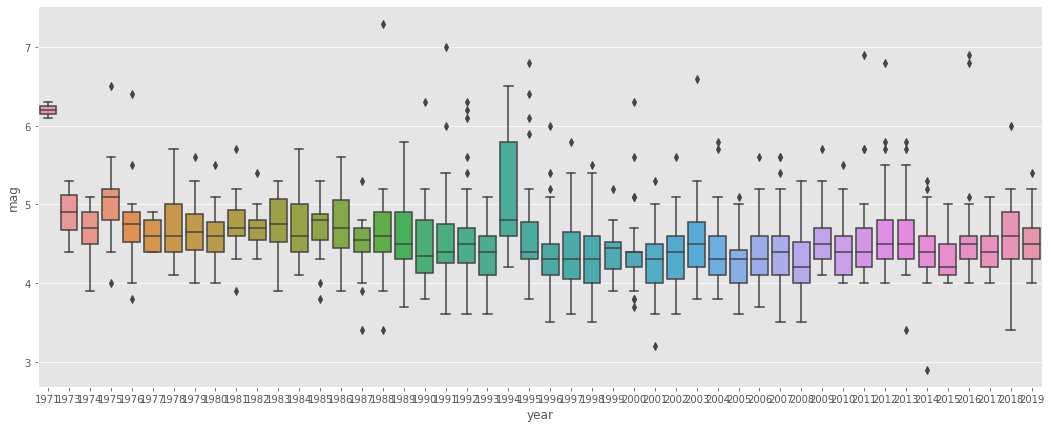

In [7]:
plt.figure(figsize=(18, 7))
sns.boxplot('year', 'mag', data=mmeq_df);

In [26]:
count_df = mmeq_df.groupby('location').size()
mmap = folium.Map(location=[19.9940,96.0864], zoom_start=5)
folium.Choropleth(
    geo_data='Applied Data Science Specialization(IBM)/Data Visualization with Python/myanmar.json',
    data=count_df,
    key_on='feature.properties.name',
    line_color='black',
    fill_color='YlOrRd',
    nan_fill_color='white',
    fill_opacity=1, 
    line_opacity=0.5,
    legend_name ='Magnitude',
    name="earthquake of Myanmar",
    overlay=True,
    highlight=True).add_to(mmap)
folium.LayerControl().add_to(mmap)
mmap.save('eq_Choropleth_mm.html')
#mmap

In [9]:
count_df.sort_values(ascending=False).reset_index().rename(columns={0:'frequency'})

,location,frequency
0,Sagaing,616
1,Kachin,218
2,Magway,213
3,Shan,106
4,Coast of Myanmar,100
5,Bago,76
6,Chin,75
7,Ayeyarwady,37
8,Mandalay,35
9,Rakhine,31


In [10]:
hours_df = mmeq_df.groupby(['hour', 'maggrp']).size().reset_index()
hours_df[hours_df.maggrp=='[5, 6)'].sort_values(0, ascending=False)

,hour,maggrp,0
70,18,"[5, 6)",14
21,5,"[5, 6)",12
25,6,"[5, 6)",12
10,2,"[5, 6)",11
59,15,"[5, 6)",11
37,9,"[5, 6)",9
63,16,"[5, 6)",9
2,0,"[5, 6)",8
13,3,"[5, 6)",8
17,4,"[5, 6)",8


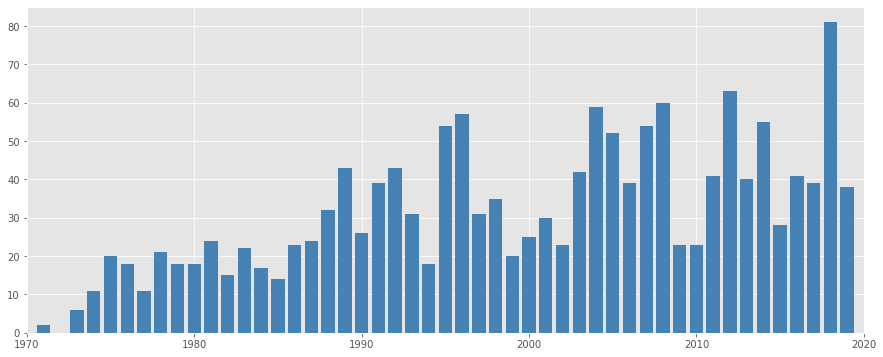

In [11]:
plt.figure(figsize=(15, 6))
year_df = mmeq_df.groupby('year').size().reset_index()
year_df.columns = 'year', 'frequency'
ax = plt.bar(year_df.year, year_df.frequency, color='steelblue')
plt.xlim([1970, 2020]);

In [12]:
@interact(variable=['month', 'year', 'hour', 'minute'])
def barplot(variable):
    plt.figure(figsize=(14,7))
    order = ['[2, 3)', '[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)', '[7, 8)']
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September','October', 'November', 'December']
    ax = sns.countplot(variable, hue='maggrp', hue_order=order, data=mmeq_df)
    if variable == 'year':
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    if variable == 'month':
        ax.set_xticklabels(months)  
    plt.legend(loc=1, bbox_to_anchor=(1.12, 1.015),
               title='Magnitude', title_fontsize='13',
               labelspacing=0.9, borderpad=0.95);

interactive(children=(Dropdown(description='variable', options=('month', 'year', 'hour', 'minute'), value='mon…

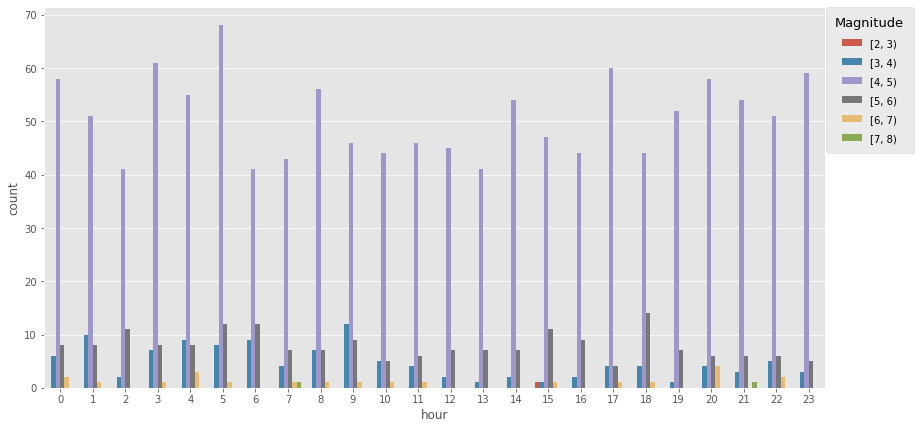

In [13]:
plt.figure(figsize=(14,7))
order = ['[2, 3)', '[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)', '[7, 8)']
sns.countplot('hour', hue='maggrp', hue_order=order, data=mmeq_df)
plt.legend(loc=1, bbox_to_anchor=(1.12, 1.015),
           title='Magnitude', title_fontsize='13',
           labelspacing=0.9, borderpad=0.95);

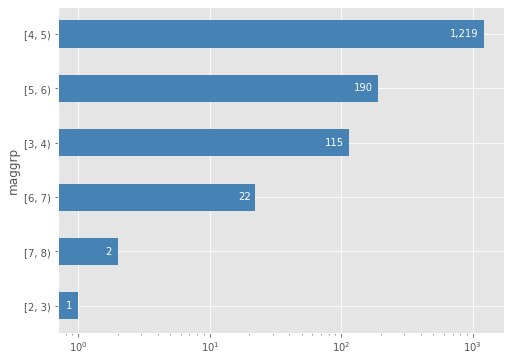

In [14]:
plt.figure(figsize=(8, 6))
mag = mmeq_df.groupby('maggrp').size().sort_values()
mag.plot.barh(color='steelblue')
plt.semilogx()
for y,x in enumerate(mag):
    xl = x*0.8 if x < 3 else x*0.75 if x < 100 else x*0.65 if x < 1200 else x*0.55
    plt.text(xl, y-0.05, f'{x:,}', color='white');

In [15]:
mmeq_df[(mmeq_df.maggrp=='[7, 8)') | (mmeq_df.maggrp=='[2, 3)')].sort_values('mag')

,local_time,date,latitude,longitude,depth,mag,magType,location,year,month,hour,minute,maggrp
1472,2014-08-04 15:41:50.500000+06:30,2014-08-04,16.1393,96.0109,10.0,2.9,ml,Coast of Myanmar,2014,8,15,41,"[2, 3)"
512,1991-01-05 21:27:11.590000+06:30,1991-01-05,23.6130,95.9010,19.7,7.0,mw,Sagaing,1991,1,21,27,"[7, 8)"
242,1988-08-06 07:06:24.650000+06:30,1988-08-06,25.1490,95.1270,90.5,7.3,mw,Sagaing,1988,8,7,6,"[7, 8)"


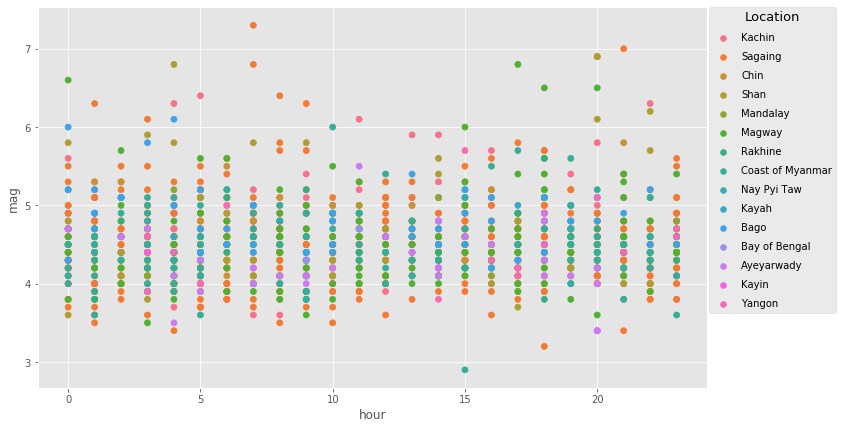

In [16]:
plt.figure(figsize=(12, 7))
ax = sns.scatterplot('hour', 'mag',
                     hue='location',
                     data=mmeq_df,
                     edgecolor=None)
h,l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc=1, 
          bbox_to_anchor=(1.2, 1.015), 
          title='Location',
          title_fontsize='13',
          labelspacing=0.9);

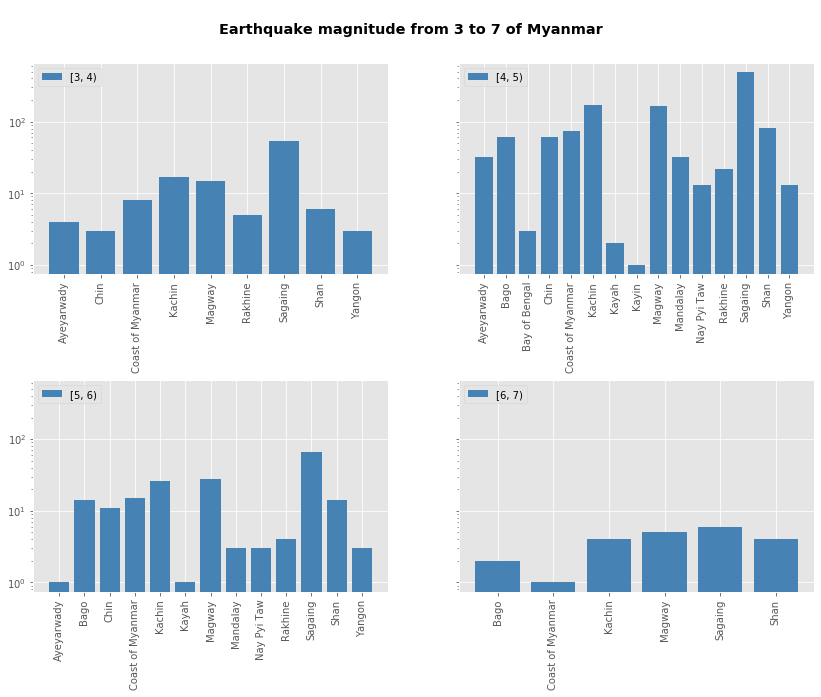

In [17]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(14, 10))
grouping = mmeq_df.groupby(['location', 'maggrp'], as_index=False).size().reset_index()
grouping.columns = 'location', 'maggrp', 'frequency'
maggrps =['[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)']
axs = ax1, ax2, ax3, ax4
for maggrp, ax in zip(maggrps, axs):
    grp_ff = grouping[grouping.maggrp==maggrp]
    ax.bar(grp_ff.location, grp_ff.frequency, label=maggrp, color='steelblue')
    ax.set_yscale('log')
    ax.legend(loc=2)
    for lab in ax.get_xticklabels():
        lab.set_rotation(90)
plt.subplots_adjust(top=0.86, hspace=0.5)
fig.text(.5, 0.9, '\nEarthquake magnitude from 3 to 7 of Myanmar',
         fontdict={'size':'x-large', 'weight':'semibold', 'ha':'center'});

In [18]:
mag_to_num_dict = {'[2, 3)':0, '[3, 4)':1, '[4, 5)':2, '[5, 6)':3, '[6, 7)':4, '[7, 8)':5}
num_to_mag_dict = {0:'[2, 3)', 1:'[3, 4)', 2:'[4, 5)', 3:'[5, 6)', 4:'[6, 7)', 5:'[7, 8)'}
loc_to_num_dict = {'Ayeyarwady':0,'Bago':1, 'Chin':2, 'Kachin':3, 'Kayah':4, 'Kayin':5, 'Magway':6, 'Mandalay':7,
                   'Mon':8, 'Nay Pyi Taw':9, 'Rakhine':10, 'Sagaing':11, 'Shan':12, 'Tanintharyi':13, 'Yangon':14,
                   'Coast of Myanmar':15, 'Bay of Bengal':16}
num_to_loc_dict = {0:'Ayeyarwady',1:'Bago', 2:'Chin', 3:'Kachin', 4:'Kayah', 5:'Kayin', 6:'Magway', 7:'Mandalay',
                   8:'Mon', 9:'Nay Pyi Taw', 10:'Rakhine', 11:'Sagaing', 12:'Shan', 13:'Tanintharyi', 14:'Yangon',
                   15:'Coast of Myanmar', 16:'Bay of Bengal'}
ml_df = mmeq_df.groupby(['month', 'hour', 'maggrp']).size().reset_index() # 'year',  'location',,  'mag'
ml_df.rename(columns={0:'frequency'}, inplace=True)
ml_df = ml_df.replace(loc_to_num_dict).replace(mag_to_num_dict) #[ 1,  3,  6,  4,  2,  8,  5, 10,  7,  9, 13, 12]
ml_df[ml_df.frequency==7]

,month,hour,maggrp,frequency
84,2,23,2,7
91,3,3,2,7
127,3,21,2,7
129,3,22,2,7
140,4,4,2,7
151,4,10,2,7
160,4,14,2,7
202,5,11,2,7
215,5,20,2,7
223,6,0,2,7


In [19]:
X = ml_df.drop(columns='frequency')
y = ml_df['frequency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))
#result = model.predict(X_test)
#sum(y_test == result.round(1))/sum(y_test)

0.3619047619047619


In [20]:
model.predict([[8, 1, 2]])

array([7.])

In [21]:
sum(model.predict(X_test) == y_test.values)/len(X_test)

0.3619047619047619

In [22]:
grouping[grouping.location=='Yangon']

,location,maggrp,frequency
42,Yangon,"[3, 4)",3
43,Yangon,"[4, 5)",13
44,Yangon,"[5, 6)",3


In [23]:
mmeq_df.mag.min(), mmeq_df.mag.max()

(2.9, 7.3)

In [24]:
@interact(location=grouping.location.unique())
def region_mg_plot(location):
    plt.figure(figsize=(8,6))
    sub_df = grouping[grouping.location==location]
    ax = sns.barplot('maggrp', 'frequency', data=sub_df)    

interactive(children=(Dropdown(description='location', options=('Ayeyarwady', 'Bago', 'Bay of Bengal', 'Chin',…

In [25]:
grouping[grouping.location=='Ayeyarwady']

,location,maggrp,frequency
0,Ayeyarwady,"[3, 4)",4
1,Ayeyarwady,"[4, 5)",32
2,Ayeyarwady,"[5, 6)",1
